<a href="https://colab.research.google.com/github/EmiliaPaula/Tabela-de-Regressao/blob/main/Tabela_de_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instala a biblioteca apra gerar gráficos.
! pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from babel.numbers import format_currency
#para preparar os dados
from sklearn.model_selection import train_test_split #divisão dos dados para treinamento e teste
from sklearn.preprocessing import LabelEncoder   #para transformar Strings em números inteiros
from sklearn.preprocessing import StandardScaler #para a padronização dos dados

#para redes neurais
from sklearn.neural_network import MLPClassifier #rede neural
from sklearn.metrics import accuracy_score       #avaliação do modelo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#para gravar um modelo gerado por aprendizagem de máquina
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# abre o prompt para importacao de arquivo na maquina local
from google.colab import files
uploaded = files.upload()
# Lê o arquivo CSV para um DataFrame
df = pd.read_csv('experiencia_salario.csv', delimiter=';')
# Exibe as primeiras linhas do DataFrame
df.head()

Saving experiencia_salario.csv to experiencia_salario.csv


,"experiencia,salario"
0,"3,30"
1,"8,57"
2,"9,64"
3,"13,72"
4,"3,36"


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando a base de dados salario no formato CSV
base = pd.read_csv('/content/drive/MyDrive/Dados/experiencia_salario.csv', sep=";")

display(base)

,"experiencia,salario"
0,"3,30"
1,"8,57"
2,"9,64"
3,"13,72"
4,"3,36"
5,"6,43"
6,"11,59"
7,"21,90"
8,"1,20"
9,"16,83"


In [ ]:
print(base.columns)

Index(['experiencia,salario'], dtype='object')


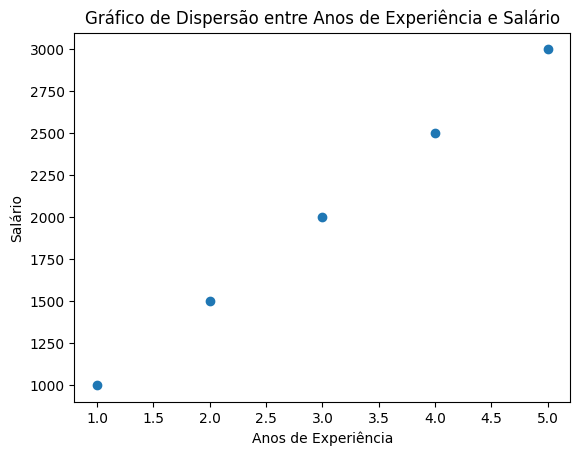

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
# Sample data as a string
data = """experiencia;salario
1;1000
2;1500
3;2000
4;2500
5;3000"""
# Create a DataFrame from the sample data
base = pd.read_csv(io.StringIO(data), delimiter=';')
# Create the scatter plot
plt.scatter(base['experiencia'], base['salario'])
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.title('Gráfico de Dispersão entre Anos de Experiência e Salário')
plt.show()

In [ ]:
df.describe()

,"experiencia,salario"
count,10
unique,10
top,"3,30"
freq,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   experiencia,salario  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


In [ ]:
print(df.isnull().sum())  # Mostra quantos valores nulos existem por coluna

experiencia,salario    0
dtype: int64


In [ ]:
print(df.dtypes)  # Mostra o tipo de cada coluna

experiencia,salario    object
dtype: object


In [ ]:
# 📌 1. Verificar e tratar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Preencher valores ausentes com a média da coluna
df.fillna(df.mean(), inplace=True)

# 📌 2. Identificar outliers usando percentis
p0 = df['salario'].quantile(0.01)  # Percentil 1%
p4 = df['salario'].quantile(0.99)  # Percentil 99%

# Filtrar os outliers
outliers = df[(df['salario'] < p0) | (df['salario'] > p4)]
print("\nOutliers encontrados:")
print(outliers)

# 📌 3. Remover outliers (opcional)
df_cleaned = df[(df['salario'] >= p0) & (df['salario'] <= p4)]

# Exibir o resumo final dos dados tratados
print("\nResumo dos dados tratados:")
print(df_cleaned.describe())


Valores ausentes por coluna:
experiencia,salario    0
dtype: int64


TypeError: Could not convert ['3,308,579,6413,723,366,4311,5921,901,2016,83'] to numeric

In [ ]:
import numpy as np

# Função para limpar e converter cada valor da coluna 'salario'
def clean_and_convert_salary(value):
    try:
        # Se o valor já for numérico, retorna como está
        if isinstance(value, (int, float)):
            return value

        # Tenta converter o valor para numérico diretamente
        return float(value)

    except ValueError:
        # Se a conversão direta falhar, aplica tratamento para vírgulas e espaços
        try:
            cleaned_value = value.replace(",", ".").replace(" ", "")
            return float(cleaned_value)
        except (TypeError, AttributeError, ValueError):
            # Se ainda não for possível converter, retorna np.nan
            return np.nan

# Aplica a função a cada valor da coluna 'salario' e atualiza a coluna
df['salario'] = df['salario'].apply(clean_and_convert_salary)

# Agora, preenche os valores ausentes (np.nan) com a média da coluna
df['salario'].fillna(df['salario'].mean(), inplace=True)




KeyError: 'salario'